<a href="https://colab.research.google.com/github/Comfortade/Flood-Prediction/blob/main/Flood_Prediction_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

# Load your Data

In [ ]:
df = pd.read_csv('lagos_weather.csv')
print(df.head())

   Unnamed: 0   name    datetime  tempmax  tempmin  temp  feelslikemax  \
0           0  Lagos  2002-01-01     28.6     25.6  27.2          33.8   
1           1  Lagos  2002-01-02     33.1     26.1  29.0          39.4   
2           2  Lagos  2002-01-03     34.1     25.1  29.1          35.2   
3           3  Lagos  2002-01-04     33.1     33.1  33.1          39.4   
4           4  Lagos  2002-01-05     31.1     25.6  28.3          37.4   

   feelslikemin  feelslike   dew  ...  severerisk              sunrise  \
0          25.6       30.7  25.2  ...         NaN  2002-01-01T06:57:21   
1          26.1       33.8  25.1  ...         NaN  2002-01-02T06:57:46   
2          25.1       31.7  23.2  ...         NaN  2002-01-03T06:58:11   
3          39.4       39.4  24.1  ...         NaN  2002-01-04T06:58:35   
4          25.6       33.1  25.4  ...         NaN  2002-01-05T06:58:59   

                sunset  moonphase        conditions  \
0  2002-01-01T18:42:38       0.57  Partially cloudy   


In [ ]:
df.columns

Index(['Unnamed: 0', 'name', 'datetime', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions',
       'description', 'icon', 'stations', 'windspeedmax', 'windspeedmin'],
      dtype='object')

In [ ]:
df.shape

(8676, 36)

In [ ]:
# Specify the path to your Excel file
file_path = r'C:\Users\comad\ML\HNG\Flood event.xlsx'

# Load the Excel file
flood = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
print(flood)

    Year      Month  Event                     Impact Areas
0   2009       July  Flood   Lagos island, Ikoyi, VI, Lekki
1   2009    October  Flood  Surulere, Lagos island, Ikorodu
2   2010       June  Flood             Ijagemo and environs
3   2010       July  Flood       Surulere, Lagos island, VI
4   2010     August  Flood           Ajegunle, Mushin, Ajah
5   2011       July  Flood  Surulere, Lagos island, Ikorodu
6   2012       June  Flood                  Ikeja, Shogunle
7   2012       July  Flood         VI, Lekki, Ajah, Ikorodu
8   2013       July  Flood    Lagos island, Surulere, Agege
9   2014      April  Flood          Oshodi, Apapa,Sururlere
10  2014       June  Flood                  Leki, Vi, Ikoyi
11  2014       July  Flood       Leki, Vi, Ikoyi & environs
12  2015       June  Flood                  Leki, Vi, Ikoyi
13  2015       July  Flood                   Lagos environs
14  2016       June  Flood               Lekki, VI, Ikorodu
15  2016       July  Flood        Park v

## Data Cleaning

In [ ]:
unique_dates = df['datetime'].unique()
print(unique_dates[:20])  # Print the first 20 unique dates to inspect


['2002-01-01' '2002-01-02' '2002-01-03' '2002-01-04' '2002-01-05'
 '2002-01-06' '2002-01-07' '2002-01-08' '2002-01-09' '2002-01-10'
 '2002-01-11' '2002-01-12' '2002-01-13' '2002-01-14' '2002-01-15'
 '2002-01-16' '2002-01-17' '2002-01-18' '2002-01-19' '2002-01-20']


In [ ]:
from datetime import datetime

def parse_date(date_str):
    for fmt in ("%Y-%m-%d", "%d/%m/%Y", "%m/%d/%Y"):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    return pd.NaT  # Return NaT if no format matches

# Apply the function to the datetime column
df['datetime'] = df['datetime'].apply(parse_date)

# Check for any NaT values
print(df['datetime'].isna().sum())  # Print the number of NaT values


0


In [ ]:
df.isnull().sum()

Unnamed: 0             0
name                   0
datetime               0
tempmax              591
tempmin              591
temp                 823
feelslikemax         591
feelslikemin         591
feelslike            823
dew                  823
humidity             823
precip               823
precipprob           823
precipcover            0
preciptype          4940
snow                4748
snowdepth           4753
windgust            2800
windspeed            598
winddir             1206
sealevelpressure    1012
cloudcover           823
visibility          1025
solarradiation      3288
solarenergy         3288
uvindex             3288
severerisk          7314
sunrise              366
sunset               366
moonphase            366
conditions          1179
description         1179
icon                1179
stations            1179
windspeedmax        8310
windspeedmin        8310
dtype: int64

In [ ]:
flood.dropna(subset = ['Impact Areas'], inplace = True)
flood.isnull().sum()

Year            0
Month           0
Event           0
Impact Areas    0
dtype: int64

In [ ]:
df['precipprob'].unique()
df.dropna(subset = ['temp','sunrise'], inplace = True)
df.isnull().sum()

Unnamed: 0             0
name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          3867
snow                3569
snowdepth           3574
windgust            1965
windspeed              0
winddir               27
sealevelpressure     189
cloudcover             0
visibility           202
solarradiation      2109
solarenergy         2109
uvindex             2109
severerisk          6135
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
windspeedmax        7497
windspeedmin        7497
dtype: int64

In [ ]:
# Drop the 'snow' and 'snowdepth' columns
df.drop(columns=['snow', 'snowdepth','windspeedmax','windspeedmin' ], inplace=True)
df.isnull().sum()

Unnamed: 0             0
name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          3867
windgust            1965
windspeed              0
winddir               27
sealevelpressure     189
cloudcover             0
visibility           202
solarradiation      2109
solarenergy         2109
uvindex             2109
severerisk          6135
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

In [ ]:
df['preciptype'].unique()

array([nan, 'rain'], dtype=object)

In [ ]:
df['preciptype'].fillna('No rain', inplace = True)
df.isnull().sum()

Unnamed: 0             0
name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype             0
windgust            1965
windspeed              0
winddir               27
sealevelpressure     189
cloudcover             0
visibility           202
solarradiation      2109
solarenergy         2109
uvindex             2109
severerisk          6135
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

In [ ]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

print("Numeric columns:", numeric_cols)
print("Non-numeric columns:", non_numeric_cols)


Numeric columns: Index(['Unnamed: 0', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'moonphase'],
      dtype='object')
Non-numeric columns: Index(['name', 'datetime', 'preciptype', 'sunrise', 'sunset', 'conditions',
       'description', 'icon', 'stations'],
      dtype='object')


In [ ]:
# Fill missing values for numeric columns with mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df.isnull().sum()

Unnamed: 0          0
name                0
datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
severerisk          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
dtype: int64

In [ ]:
df.shape

(7497, 32)

## Data Visualization

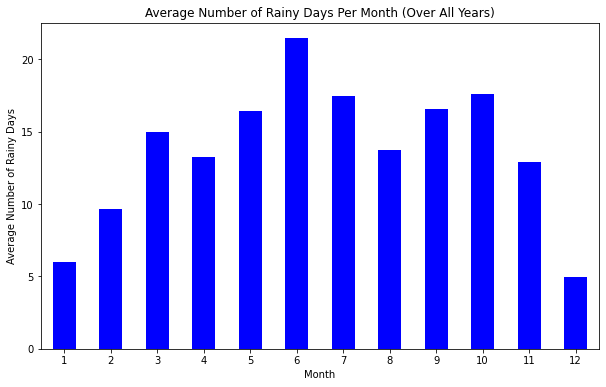

In [ ]:
# Filter data for rain only
rain_data = df[df['preciptype'] == 'rain']

# Create new columns for the month and year
rain_data['year'] = rain_data['datetime'].dt.year
rain_data['month'] = rain_data['datetime'].dt.month

# Count the number of rainy days per month for each year
monthly_rain_counts = rain_data.groupby(['year', 'month']).size().unstack(fill_value=0)

# Calculate the average number of rainy days per month over all years
average_monthly_rain_counts = monthly_rain_counts.mean()

# Plotting the average number of rainy days per month
plt.figure(figsize=(10, 6))
average_monthly_rain_counts.plot(kind='bar', color='blue')
plt.title('Average Number of Rainy Days Per Month (Over All Years)')
plt.xlabel('Month')
plt.ylabel('Average Number of Rainy Days')
plt.xticks(rotation=0)
plt.show()

### Finding dates, months and year with the most rain

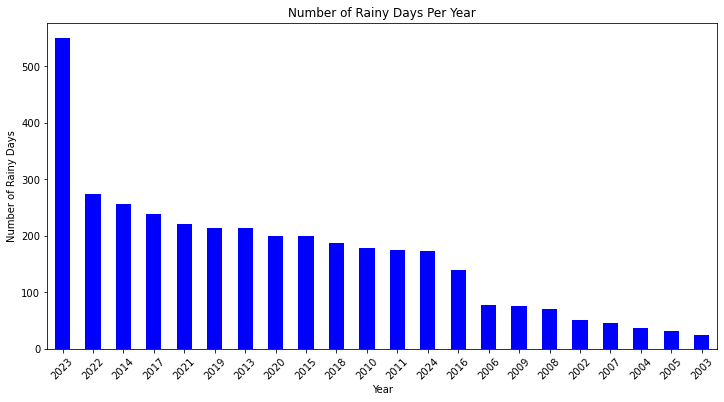

In [ ]:
# Convert datetime column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Filter data for rain only
rain_data = df[df['preciptype'] == 'rain']

# Extract the year
rain_data['year'] = rain_data['datetime'].dt.year

# Count the number of rainy days per year
yearly_rain_counts = rain_data['year'].value_counts().sort_index()

# Sort the years by the number of rainy days
sorted_yearly_rain_counts = yearly_rain_counts.sort_values(ascending=False)

# Plotting the number of rainy days per year
plt.figure(figsize=(12, 6))
sorted_yearly_rain_counts.plot(kind='bar', color='blue')
plt.title('Number of Rainy Days Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Rainy Days')
plt.xticks(rotation=45)
plt.show()

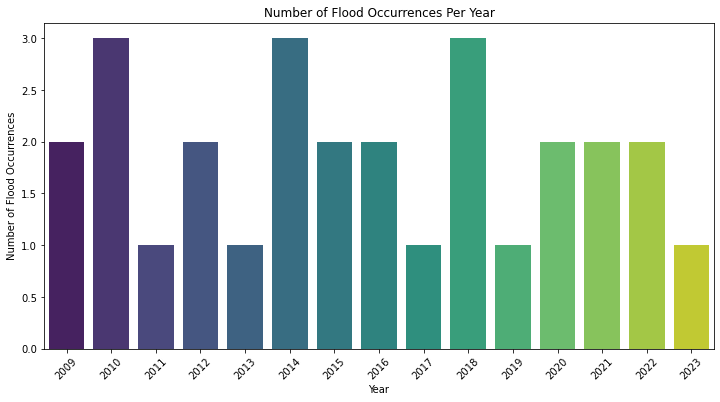

In [ ]:
# Count the number of flood occurrences per year
yearly_flood_counts = flood['Year'].value_counts().sort_index()

# Plotting the number of flood occurrences per year
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_flood_counts.index, y=yearly_flood_counts.values, palette='viridis')
plt.title('Number of Flood Occurrences Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Flood Occurrences')
plt.xticks(rotation=45)
plt.show()


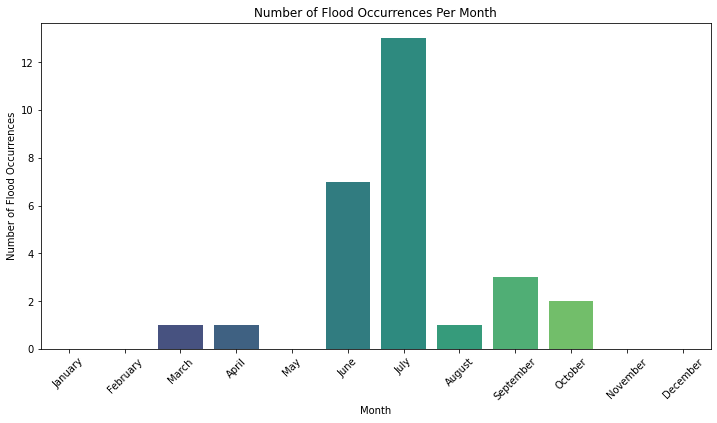

In [ ]:
# Count the number of flood occurrences per month
monthly_flood_counts = flood['Month'].value_counts().sort_index()

# Convert month names to categorical type to maintain order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
flood['Month'] = pd.Categorical(flood['Month'], categories=month_order, ordered=True)

# Recalculate monthly flood counts to ensure correct order
monthly_flood_counts = flood['Month'].value_counts().sort_index()

# Plotting the number of flood occurrences per month
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_flood_counts.index, y=monthly_flood_counts.values, palette='viridis')
plt.title('Number of Flood Occurrences Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Flood Occurrences')
plt.xticks(rotation=45)
plt.show()


In [ ]:
flood

,Year,Month,Event,Impact Areas
0,2009,July,Flood,"Lagos island, Ikoyi, VI, Lekki"
1,2009,October,Flood,"Surulere, Lagos island, Ikorodu"
2,2010,June,Flood,Ijagemo and environs
3,2010,July,Flood,"Surulere, Lagos island, VI"
4,2010,August,Flood,"Ajegunle, Mushin, Ajah"
5,2011,July,Flood,"Surulere, Lagos island, Ikorodu"
6,2012,June,Flood,"Ikeja, Shogunle"
7,2012,July,Flood,"VI, Lekki, Ajah, Ikorodu"
8,2013,July,Flood,"Lagos island, Surulere, Agege"
9,2014,April,Flood,"Oshodi, Apapa,Sururlere"


## Building Models for Prediction

In [ ]:

# Drop the 'Impact Area' column
flood.drop(columns=['Impact Areas'], inplace=True)


In [ ]:
# Convert 'Year' and 'Month' columns to a 'Date' column
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
flood['Month'] = flood['Month'].map(month_mapping)

# Debugging: Check if Month mapping worked
print("Month column after mapping:\n", flood['Month'].head())

# Create Date column
flood['Date'] = pd.to_datetime(flood[['Year', 'Month']].assign(day=1), errors='coerce')

# Debugging: Check if Date conversion worked
print("Date column after conversion:\n", flood['Date'].head())

# Filter out rows with NaT values in the 'Date' column
flood = flood.dropna(subset=['Date'])

# Debugging: Check if there are any rows left after dropping NaT
print("Flood data after dropping NaT:\n", flood.head())

# Create a daily frequency flood occurrence DataFrame
flood['Flood_Occurrence'] = 1
flood_daily = flood.set_index('Date').resample('D').sum().reset_index()
flood_daily['Flood_Occurrence'] = flood_daily['Flood_Occurrence'].apply(lambda x: 1 if x > 0 else 0)

# Debugging: Check the final daily flood occurrence data
print("Daily flood occurrence data:\n", flood_daily.head())

Month column after mapping:
 0     7
1    10
2     6
3     7
4     8
Name: Month, dtype: category
Categories (12, int64): [1 < 2 < 3 < 4 ... 9 < 10 < 11 < 12]
Date column after conversion:
 0   2009-07-01
1   2009-10-01
2   2010-06-01
3   2010-07-01
4   2010-08-01
Name: Date, dtype: datetime64[ns]
Flood data after dropping NaT:
    Year Month  Event       Date
0  2009     7  Flood 2009-07-01
1  2009    10  Flood 2009-10-01
2  2010     6  Flood 2010-06-01
3  2010     7  Flood 2010-07-01
4  2010     8  Flood 2010-08-01


TypeError: category type does not support sum operations

In [ ]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['datetime']).dt.date

# Drop non-numeric columns
numeric_df = df.drop(columns=['datetime', 'name', 'preciptype', 'sunrise', 'sunset', 'conditions', 'description', 'icon', 'stations'])

# Resample the weather data to daily frequency
df_daily = numeric_df.groupby('Date').mean().reset_index()

# Display the processed weather data
print("Processed daily weather data:\n", df_daily.head())


In [ ]:
# Ensure 'Date' columns in both dataframes are of datetime type
df_daily['Date'] = pd.to_datetime(df_daily['Date'])
flood_daily['Date'] = pd.to_datetime(flood_daily['Date'])

# Merge daily weather data with flood data
merged_data = pd.merge(df_daily, flood_daily[['Date', 'Flood_Occurrence']], on='Date', how='left')
merged_data['Flood_Occurrence'].fillna(0, inplace=True)

# Display the merged data
print("Merged weather and flood data:\n", merged_data.head())


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Prepare the data for training
X = merged_data.drop(columns=['Date', 'Flood_Occurrence'])
y = merged_data['Flood_Occurrence']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
# Ensure 'Date' column in new_weather_data is in datetime format
new_weather_data['Date'] = pd.to_datetime(new_weather_data['Date'])

# Drop 'Note' column if it exists
if 'Note' in new_weather_data.columns:
    new_weather_data = new_weather_data.drop(columns=['Note'])

# Prepare the new weather data for prediction
new_weather_features = new_weather_data.drop(columns=['Date'])

# Ensure new_weather_features has the same columns as the training data
missing_cols = set(X_train.columns) - set(new_weather_features.columns)
for col in missing_cols:
    new_weather_features[col] = 0

new_weather_features = new_weather_features[X_train.columns]  # Reorder columns to match

# Predict flood likelihood
new_weather_data['Flood_Prediction'] = rf_model.predict(new_weather_features)

# Display the predictions
print("New weather data with flood predictions:\n", new_weather_data)


In [ ]:
import matplotlib.pyplot as plt

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(new_weather_data['Date'].values, new_weather_data['Flood_Prediction'].values, marker='o', linestyle='-', label='Flood Prediction')
plt.axhline(y=0.5, color='r', linestyle='--', label='Threshold')
plt.xlabel('Date')
plt.ylabel('Flood Prediction')
plt.title('Flood Predictions for the Next 30 Days')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Applying SMOTE

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Assuming 'df' contains your weather data and 'flood_daily' contains flood occurrence data

# Convert 'Date' columns to datetime in both dataframes
df['Date'] = pd.to_datetime(df['datetime']).dt.date
flood_daily['Date'] = pd.to_datetime(flood_daily['Date']).dt.date

# Merge the datasets
merged_data = pd.merge(df, flood_daily[['Date', 'Flood_Occurrence']], on='Date', how='left')
merged_data['Flood_Occurrence'].fillna(0, inplace=True)

# Ensure these columns are dropped if they exist
columns_to_drop = ['Date', 'datetime', 'name', 'preciptype', 'sunrise', 'sunset', 'conditions', 'description', 'icon', 'stations', 'Year', 'Month', 'Event']
existing_columns_to_drop = [col for col in columns_to_drop if col in merged_data.columns]

# Feature engineering: Dropping unnecessary columns
features = merged_data.drop(columns=existing_columns_to_drop)

# Target variable
target = merged_data['Flood_Occurrence']

# Handling categorical variables
categorical_cols = features.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoded_cols = encoder.fit_transform(features[categorical_cols])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Combine encoded features with the rest of the features
features = features.drop(columns=categorical_cols)
features = pd.concat([features.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(features, target)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Feature selection using RFECV
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
selector = RFECV(xgb_model, step=1, cv=5)
selector = selector.fit(X_train, y_train)

# Select important features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_selected, y_train)

best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test_selected)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Preparing new weather data
new_weather_data = pd.read_excel(r'C:\Users\comad\ML\HNG\new_weather_data.xlsx')
new_weather_data['Date'] = pd.to_datetime(new_weather_data['Date'])
new_weather_features = new_weather_data.drop(columns=['Date', 'Day', 'Weather Source', 'Note'])

# Ensure consistency in feature names by adding missing columns
for col in features.columns:
    if col not in new_weather_features.columns:
        new_weather_features[col] = 0

# Ensure the order of columns matches the training set
new_weather_features = new_weather_features[features.columns]

# One-hot encode new weather data
new_weather_encoded_cols = encoder.transform(new_weather_features[categorical_cols])
new_weather_encoded_df = pd.DataFrame(new_weather_encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Combine new weather features
new_weather_features = new_weather_features.drop(columns=categorical_cols)
new_weather_features = pd.concat([new_weather_features.reset_index(drop=True), new_weather_encoded_df.reset_index(drop=True)], axis=1)

# Select important features from new weather data
new_weather_features_selected = selector.transform(new_weather_features)

# Predict flood likelihood
new_weather_data['Flood_Prediction'] = best_model.predict(new_weather_features_selected)

# Display the predictions
print("New weather data with flood predictions:")
print(new_weather_data)

# Plot the predictions with an appropriate threshold
plt.figure(figsize=(10, 6))
plt.plot(new_weather_data['Date'].values, new_weather_data['Flood_Prediction'].values, marker='o', linestyle='-', label='Flood Prediction')
plt.axhline(y=0.5, color='r', linestyle='--', label='Threshold')
plt.xlabel('Date')
plt.ylabel('Flood Prediction')
plt.title('Flood Predictions for the Next 30 Days')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Time Series

In [ ]:


# Load the new weather data (assuming it's loaded in new_weather_data)
new_weather_data['Date'] = pd.to_datetime(new_weather_data['Date'])
new_weather_data = new_weather_data[['Date', 'Max Temp', 'Min Temp']]

# Convert temperatures to strings, remove degree symbols, and convert to numeric
new_weather_data['Max Temp'] = new_weather_data['Max Temp'].astype(str).str.replace('°', '').astype(float)
new_weather_data['Min Temp'] = new_weather_data['Min Temp'].astype(str).str.replace('°', '').astype(float)

In [ ]:
# Ensure 'Date' columns are of datetime type
flood_daily['Date'] = pd.to_datetime(flood_daily['Date'])

# Combine with flood data (assuming flood_daily is the processed flood data)
combined_data = pd.merge(new_weather_data, flood_daily[['Date', 'Flood_Occurrence']], on='Date', how='left')
combined_data['Flood_Occurrence'].fillna(0, inplace=True)

# Feature engineering: Create a combined feature for ARIMA
combined_data['Combined_Feature'] = combined_data['Max Temp'] * combined_data['Min Temp']


In [ ]:
# Fit ARIMA model on the combined feature
arima_model = ARIMA(combined_data['Combined_Feature'], order=(2, 1, 2))
arima_result = arima_model.fit()


In [ ]:
# Forecast for the next 30 days
forecast = arima_result.forecast(steps=30)

# Create a DataFrame for the forecasted values
forecast_dates = pd.date_range(start=new_weather_data['Date'].max() + pd.Timedelta(days=1), periods=30, freq='D')
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Combined_Feature': forecast})

# Predict flood occurrence based on the forecasted combined feature
forecast_df['Flood_Prediction'] = forecast_df['Forecasted_Combined_Feature'].apply(lambda x: 1 if x > threshold else 0)


In [ ]:
new_threshold = 677.5

# Plot the predictions with the new threshold
plt.figure(figsize=(10, 6))
plt.plot(forecast_df['Date'].values, forecast_df['Forecasted_Combined_Feature'].values, marker='o', linestyle='-', label='Forecasted Combined Feature')
plt.axhline(y=new_threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Date')
plt.ylabel('Forecasted Combined Feature')
plt.title('Flood Predictions for the Next 30 Days with Adjusted Threshold')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Update flood predictions based on the new threshold
forecast_df['Flood_Prediction'] = (forecast_df['Forecasted_Combined_Feature'] > new_threshold).astype(int)

# Display the updated predictions
print("Updated flood predictions:\n", forecast_df[['Date', 'Flood_Prediction']])


## Checking out the best threshold

In [ ]:


# Define a range of thresholds to evaluate
thresholds = np.arange(0.1, 1.0, 0.1)

# Placeholder lists to store evaluation metrics
precisions = []
recalls = []
f1_scores = []
accuracies = []

# Assuming 'forecast_df' has 'Date' and 'Forecasted_Combined_Feature' columns
# Assuming 'flood_daily' has 'Date' and 'Flood_Occurrence' columns

# Combine forecasted data with actual flood occurrences
merged_data = pd.merge(forecast_df[['Date', 'Forecasted_Combined_Feature']], flood_daily[['Date', 'Flood_Occurrence']], on='Date', how='left')
merged_data['Flood_Occurrence'].fillna(0, inplace=True)

# Iterate over each threshold value
for threshold in thresholds:
    # Predict flood likelihood based on the current threshold
    predictions = (merged_data['Forecasted_Combined_Feature'] > threshold).astype(int)

    # Calculate precision, recall, f1-score, and accuracy
    precision = precision_score(merged_data['Flood_Occurrence'], predictions)
    recall = recall_score(merged_data['Flood_Occurrence'], predictions)
    f1 = f1_score(merged_data['Flood_Occurrence'], predictions)
    accuracy = accuracy_score(merged_data['Flood_Occurrence'], predictions)

    # Append metrics to respective lists
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    accuracies.append(accuracy)

# Create a DataFrame to store the results
threshold_results = pd.DataFrame({
    'Threshold': thresholds,
    'Precision': precisions,
    'Recall': recalls,
    'F1_Score': f1_scores,
    'Accuracy': accuracies
})

# Display the results
print(threshold_results)


In [ ]:
# Check the distribution of the Flood_Occurrence column
print("Flood occurrence distribution:\n", merged_data['Flood_Occurrence'].value_counts())


### Another method

In [ ]:
import pandas as pd

# Ensure the Date columns are in datetime format
new_weather_data['Date'] = pd.to_datetime(new_weather_data['Date'], errors='coerce')

# Convert temperature columns to strings first, then to numeric values
new_weather_data['Max Temp'] = pd.to_numeric(new_weather_data['Max Temp'].astype(str).str.replace('°', ''), errors='coerce')
new_weather_data['Min Temp'] = pd.to_numeric(new_weather_data['Min Temp'].astype(str).str.replace('°', ''), errors='coerce')

# Fill any NaN values with the mean of the column
new_weather_data['Max Temp'].fillna(new_weather_data['Max Temp'].mean(), inplace=True)
new_weather_data['Min Temp'].fillna(new_weather_data['Min Temp'].mean(), inplace=True)

# Ensure Date columns in df and flood_daily are in datetime format
df['Date'] = pd.to_datetime(df['datetime']).dt.date
flood_daily['Date'] = pd.to_datetime(flood_daily['Date']).dt.date

# Convert Date columns back to datetime to ensure compatibility in merging
df['Date'] = pd.to_datetime(df['Date'])
flood_daily['Date'] = pd.to_datetime(flood_daily['Date'])

# Select only numeric columns from df for resampling
numeric_cols = df.select_dtypes(include=['number']).columns
df_daily = df[['Date'] + list(numeric_cols)].set_index('Date').resample('D').mean().reset_index()

# Merge historical weather data with flood data and new weather data
merged_data = pd.merge(df_daily, flood_daily[['Date', 'Flood_Occurrence']], on='Date', how='left')
merged_data = pd.merge(merged_data, new_weather_data[['Date', 'Max Temp', 'Min Temp']], on='Date', how='left')

# Fill any NaN values that may have resulted from the merge
merged_data['Max Temp'].fillna(merged_data['tempmax'], inplace=True)
merged_data['Min Temp'].fillna(merged_data['tempmin'], inplace=True)

# Feature engineering: Create a combined feature for ARIMA
merged_data['Combined_Feature'] = merged_data[['Max Temp', 'Min Temp']].mean(axis=1)

print(merged_data.head())


In [ ]:
# Check for NaN values in Combined_Feature
print("Number of NaN values in Combined_Feature before dropping:", merged_data['Combined_Feature'].isna().sum())

# Drop NaN values
merged_data = merged_data.dropna(subset=['Combined_Feature'])

# Verify the result
print("Number of NaN values in Combined_Feature after dropping:", merged_data['Combined_Feature'].isna().sum())


In [ ]:
# Forecast the next 30 days
forecast_steps = len(new_weather_data)
forecast = model_fit.forecast(steps=forecast_steps)

# Add forecast to new weather data
forecast_df = pd.DataFrame({
    'Date': new_weather_data['Date'],
    'Forecasted_Combined_Feature': forecast
})


In [ ]:
# Set a threshold for flood prediction
threshold = 23  # Adjust based on your data

# Predict flood likelihood based on the threshold
forecast_df['Flood_Prediction'] = (forecast_df['Forecasted_Combined_Feature'] > threshold).astype(int)

# Display the predictions
print(forecast_df.head())


In [ ]:
import matplotlib.pyplot as plt

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(forecast_df['Date'].values, forecast_df['Forecasted_Combined_Feature'].values, marker='o', linestyle='-', label='Forecasted Combined Feature')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Date')
plt.ylabel('Forecasted Combined Feature')
plt.title('Flood Predictions for the Next 30 Days')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Convert temperature columns to numeric values
new_weather_data['Max Temp'] = new_weather_data['Max Temp'].astype(float)
new_weather_data['Min Temp'] = new_weather_data['Min Temp'].astype(float)

# Ensure correct date format for merging
df['Date'] = pd.to_datetime(df['Date'])
flood_daily['Date'] = pd.to_datetime(flood_daily['Date'])
new_weather_data['Date'] = pd.to_datetime(new_weather_data['Date'])

# Create df_daily for merging
df_daily = df.set_index('Date').resample('D').mean().reset_index()

# Merge historical weather data with flood data
merged_data = pd.merge(df_daily, flood_daily[['Date', 'Flood_Occurrence']], on='Date', how='left')
merged_data['Flood_Occurrence'].fillna(0, inplace=True)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA model on historical data
model = ARIMA(merged_data['Combined_Feature'], order=(2, 1, 2))
model_fit = model.fit()


In [ ]:
# Forecast the next 30 days
forecast_steps = len(new_weather_data)
forecast = model_fit.forecast(steps=forecast_steps)

# Ensure the forecast length matches the new weather data length
forecast = forecast[:forecast_steps]

# Add forecast to new weather data
forecast_df = pd.DataFrame({
    'Date': new_weather_data['Date'],
    'Forecasted_Combined_Feature': forecast
})


In [ ]:
# Set a threshold for flood prediction
threshold = 28  # Adjust based on your data

# Predict flood likelihood based on the threshold
forecast_df['Flood_Prediction'] = (forecast_df['Forecasted_Combined_Feature'] > threshold).astype(int)

# Display the predictions
print(forecast_df.head())


In [ ]:
import matplotlib.pyplot as plt

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(forecast_df['Date'].values, forecast_df['Forecasted_Combined_Feature'].values, marker='o', linestyle='-', label='Forecasted Combined Feature')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Date')
plt.ylabel('Forecasted Combined Feature')
plt.title('Flood Predictions for the Next 30 Days')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
